# Precipitation Extraction and correlation with c Parameter

In [1]:
from netCDF4 import Dataset
from scipy.io import netcdf
import numpy as np
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
from metpy.cbook import get_test_data

Here the dataset files are being opened, in both cases the precipation ('precip') variable is being isolated.

In [2]:
data1 = Dataset(r'Precipitation Data/full_phys.hydro.k5e-5.y231-240.nc')
ds1 = xr.open_dataset('Precipitation Data/full_phys.hydro.k5e-5.y231-240.nc', decode_times=False)
ds1

<xarray.Dataset>
Dimensions:      (lon: 64, lonb: 65, lat: 32, latb: 33, time: 2029, nv: 2,
                  scalar_axis: 1)
Coordinates:
  * lon          (lon) float32 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lonb         (lonb) float32 -2.812 2.812 8.438 14.06 ... 345.9 351.6 357.2
  * lat          (lat) float32 -85.76 -80.27 -74.74 -69.21 ... 74.74 80.27 85.76
  * latb         (latb) float32 -90.0 -83.21 -77.61 -72.05 ... 77.61 83.21 90.0
  * time         (time) float64 26.5 79.5 132.5 ... 1.075e+05 1.075e+05
  * nv           (nv) float32 1.0 2.0
  * scalar_axis  (scalar_axis) float32 0.0
Data variables: (12/22)
    tsurf        (time, lat, lon) float32 ...
    qsurf        (time, lat, lon) float32 ...
    dtd          (lat, lon) float32 ...
    infil        (time, lat, lon) float32 ...
    run          (time, lat, lon) float32 ...
    sub          (time, lat, lon) float32 ...
    ...           ...
    tot_surf     (time, scalar_axis) float32 ...
    tot_sub      (time, scalar_axis) float32 ...
    average_T1   (time) float64 ...
    average_T2   (time) float64 ...
    average_DT   (time) float64 ...
    time_bounds  (time, nv) float64 ...
Attributes:
    filename:  atmos.nc
    title:     Titan GCM with spectral core

In [3]:
data2 = Dataset(r'Precipitation Data/full_phys.hydro.k5e-5.y241-250.nc')
ds2 = xr.open_dataset('Precipitation Data/full_phys.hydro.k5e-5.y241-250.nc', decode_times=False)
ds2

<xarray.Dataset>
Dimensions:      (lon: 64, lonb: 65, lat: 32, latb: 33, time: 2029, nv: 2,
                  scalar_axis: 1)
Coordinates:
  * lon          (lon) float32 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lonb         (lonb) float32 -2.812 2.812 8.438 14.06 ... 345.9 351.6 357.2
  * lat          (lat) float32 -85.76 -80.27 -74.74 -69.21 ... 74.74 80.27 85.76
  * latb         (latb) float32 -90.0 -83.21 -77.61 -72.05 ... 77.61 83.21 90.0
  * time         (time) float64 26.5 79.5 132.5 ... 1.075e+05 1.075e+05
  * nv           (nv) float32 1.0 2.0
  * scalar_axis  (scalar_axis) float32 0.0
Data variables: (12/22)
    tsurf        (time, lat, lon) float32 ...
    qsurf        (time, lat, lon) float32 ...
    dtd          (lat, lon) float32 ...
    infil        (time, lat, lon) float32 ...
    run          (time, lat, lon) float32 ...
    sub          (time, lat, lon) float32 ...
    ...           ...
    tot_surf     (time, scalar_axis) float32 ...
    tot_sub      (time, scalar_axis) float32 ...
    average_T1   (time) float64 ...
    average_T2   (time) float64 ...
    average_DT   (time) float64 ...
    time_bounds  (time, nv) float64 ...
Attributes:
    filename:  atmos.nc
    title:     Titan GCM with spectral core

In [4]:
ds1.variables['precip']

<xarray.Variable (time: 2029, lat: 32, lon: 64)>
[4155392 values with dtype=float32]
Attributes:
    long_name:      Total precipitation
    units:          kg/m2/s
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT

In [5]:
ds2.variables['precip']

<xarray.Variable (time: 2029, lat: 32, lon: 64)>
[4155392 values with dtype=float32]
Attributes:
    long_name:      Total precipitation
    units:          kg/m2/s
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT

In [6]:
print ("ds1_min_lat = ", min(ds1.variables['lat']))
print ("ds1_max_lat = ", max(ds1.variables['lat']))
print ("ds1_min_lon = ", min(ds1.variables['lon']))
print ("ds1_max_lon = ", max(ds1.variables['lon']))
print ("ds2_min_lat = ", min(ds2.variables['lat']))
print ("ds2_max_lat = ", max(ds2.variables['lat']))
print ("ds2_min_lon = ", min(ds2.variables['lon']))
print ("ds2_max_lon = ", max(ds2.variables['lon']))

ds1_min_lat =  <xarray.Variable ()>
array(-85.76059, dtype=float32)
Attributes:
    long_name:       latitude
    units:           degrees_N
    cartesian_axis:  Y
    edges:           latb
ds1_max_lat =  <xarray.Variable ()>
array(85.76059, dtype=float32)
Attributes:
    long_name:       latitude
    units:           degrees_N
    cartesian_axis:  Y
    edges:           latb
ds1_min_lon =  <xarray.Variable ()>
array(0., dtype=float32)
Attributes:
    long_name:       longitude
    units:           degrees_E
    cartesian_axis:  X
    edges:           lonb
ds1_max_lon =  <xarray.Variable ()>
array(354.375, dtype=float32)
Attributes:
    long_name:       longitude
    units:           degrees_E
    cartesian_axis:  X
    edges:           lonb
ds2_min_lat =  <xarray.Variable ()>
array(-85.76059, dtype=float32)
Attributes:
    long_name:       latitude
    units:           degrees_N
    cartesian_axis:  Y
    edges:           latb
ds2_max_lat =  <xarray.Variable ()>
array(85.76059, dtype=

Here we are plotting the data on a x,y axis

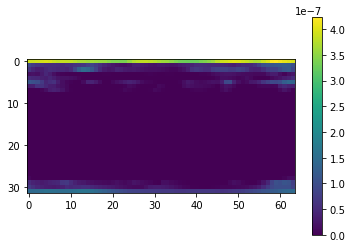

In [7]:
ds1timestep = ds1.variables['precip'][0]

plt.imshow(ds1timestep)
plt.colorbar()
plt.show()

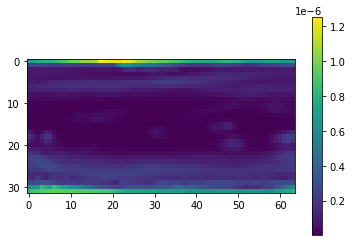

In [8]:
ds1time_averaged = np.mean(ds1.variables['precip'], axis = 0)

plt.imshow(ds1time_averaged)
plt.colorbar()
plt.show()

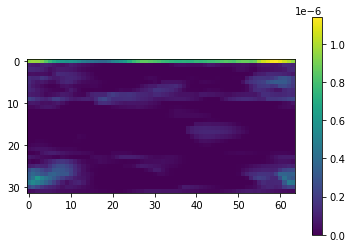

In [9]:
ds2timestep = ds2.variables['precip'][0]

plt.imshow(ds2timestep)
plt.colorbar()
plt.show()

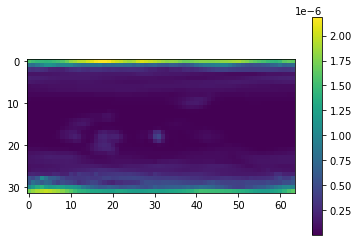

In [10]:
ds2time_averaged = np.mean(ds2.variables['precip'], axis = 0)

plt.imshow(ds2time_averaged)
plt.colorbar()
plt.show()

<xarray.Variable ()>
array(8.919066e-09, dtype=float32)

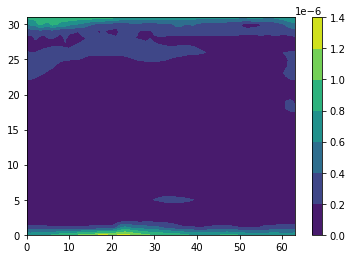

In [11]:
plt.contourf(ds1time_averaged)
plt.colorbar()

ds1time_averaged[15,5]

The formatted data merges into a an average over the 20-Titan-year period

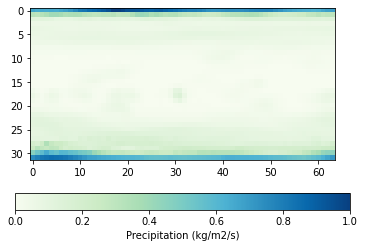

In [12]:
import matplotlib as mpl
yearavg = np.mean(np.array([ds1time_averaged, ds2time_averaged]), axis=0 )

cmap = mpl.cm.GnBu

plt.imshow(yearavg, cmap = 'GnBu')
plt.colorbar(mpl.cm.ScalarMappable(cmap=cmap),orientation = 'horizontal', label = 'Precipitation (kg/m2/s)')
plt.show()

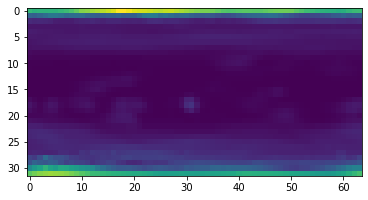

In [14]:
plt.imshow(yearavg)

In [15]:
np.shape(yearavg)

(32, 64)

Here, the process followed the following steps:
     
     - Firstly, latitudinal and longitudinal bands were converted into coordinates. This was accomplished by dividing 360 by          65 for the longitude to give us 5.53 degree increments, and dividing 180 by 33 for the latitude to give us 5.45                degree increments. 
     
     - Secondly, the geometric center for each TSS fluvial network was extracted.
     
     - Finally, the coordinates were applied to give us the dimensions on the graph which allowed for extracting the                  corresponding precipitation value.

Next, the precipitation values were converted from kg/m2/s to mm/d-1 then to mm/y-1:
    
    - First the kg/m2 was reduced by dividing the value by 450 (relating to the density of liquid methane on Titan (0.45g/cc).
    
    - Next m/s value was multiplied by 1000 to convert the measurement from meters to millimeters.
    
    - Then, the value (mm/s) was multiplied by 86400 to convert it to mm/d-1.
    
    - Finally the value was multiplied by 15.945 to convert values from days to years (A year on Titan is 15 days, 22 hours           and 41 seconds). This is the length of time that Titan takes for 1 full orbit of Saturn.

In [16]:
#B1
B1 = yearavg[27,39]
yearavg[27,39]

2.1681831e-07

In [103]:
((((B1/450)*1000)*86400)*15.945)

0.6637762387254043

In [108]:
#B3
B3 = yearavg[28,38]
yearavg[28,38]

2.4800477e-07

In [106]:
((((B3/450)*1000)*86400)*15.945)

0.7592517137163668

In [107]:
#C1
C1 = yearavg[28,27]
yearavg[28,27]

3.067599e-07

In [110]:
((((C1/450)*1000)*86400)*15.945)

0.9391269879233732

In [111]:
#E1
E1 = yearavg[22,51]
yearavg[22,51]

5.4269393e-08

In [112]:
((((E1/450)*1000)*86400)*15.945)

0.16614248908354057

In [113]:
#E3
E3 = yearavg[22,53]
yearavg[22,53]

5.0056382e-08

In [114]:
((((E3/450)*1000)*86400)*15.945)

0.1532446105704821

In [115]:
#E4
E4 = yearavg[21,53]
yearavg[21,53]

2.1779375e-08

In [116]:
((((E4/450)*1000)*86400)*15.945)

0.06667624902888747

In [119]:
#E6
E6 = yearavg[19,52]
yearavg[19,52]

2.1360451e-08

In [120]:
((((E6/450)*1000)*86400)*15.945)

0.06539373967768825

In [121]:
#E8
E8 = yearavg[18,52]
yearavg[18,52]

1.1027549e-08

In [122]:
((((E8/450)*1000)*86400)*15.945)

0.033760178545207964

In [123]:
#G1
G1 = yearavg[19,43]
yearavg[19,43]

3.08196e-08

In [124]:
((((G1/450)*1000)*86400)*15.945)

0.09435235413320699

In [126]:
#G2
G2 = yearavg[18,44]
yearavg[18,44]

3.4234127e-08

In [127]:
((((G2/450)*1000)*86400)*15.945)

0.10480572467486127

In [128]:
#G4
G4 = yearavg[18,42]
yearavg[18,42]

4.2412875e-08

In [129]:
((((G4/450)*1000)*86400)*15.945)

0.12984447200892646

In [130]:
#G6
G6 = yearavg[17,40]
yearavg[17,40]

1.9152218e-08

In [131]:
((((G6/450)*1000)*86400)*15.945)

0.058633365017612966

In [134]:
#J1
J1 = yearavg[13,51]
yearavg[13,51]

6.3133063e-09

In [135]:
((((J1/450)*1000)*86400)*15.945)

0.01932780850694371

In [136]:
#K1
K1 = yearavg[14,49]
yearavg[14,49]

1.0014273e-08

In [138]:
((((K1/450)*1000)*86400)*15.945)

0.03065809583034707

In [18]:
#A3
A3 = yearavg[26,63]
yearavg[26,63]

1.5390383e-07

In [19]:
((((A3/450)*1000)*86400)*15.945)

0.47116733082020806

In [22]:
#E5
E5 = yearavg[22,53]
yearavg[22,53]

5.0056382e-08

In [23]:
((((E5/450)*1000)*86400)*15.945)

0.1532446105704821

In [24]:
#E6
E6 = yearavg[19,52]
yearavg[19,52]

2.1360451e-08

In [25]:
((((E6/450)*1000)*86400)*15.945)

0.06539373967768825

In [27]:
#G5
G5 = yearavg[18,41]
yearavg[18,41]

3.3466147e-08

In [28]:
((((G5/450)*1000)*86400)*15.945)

0.10245460164355791

In [29]:
#G8
G8 = yearavg[19,42]
yearavg[19,42]

2.7337764e-08

In [30]:
((((G8/450)*1000)*86400)*15.945)

0.08369292438089815

In [31]:
#L1
L1 = yearavg[15,6]
yearavg[15,6]

7.5991125e-09

In [32]:
((((L1/450)*1000)*86400)*15.945)

0.023264226820174375

C:\Users\Alexz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


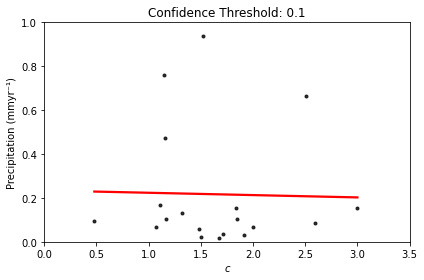

In [35]:
# Defining the libraries
import numpy as np #A libary used for working with arrays.
import matplotlib.pyplot as plt # A libary used for plotting graphs.
import pandas as pd # A libary used for faster data analysis, works in conjunction with the numpy libary.
import seaborn as sns
from matplotlib.patches import Patch # Used to customise legend.
from matplotlib.lines import Line2D # Used to customise legend.
from sklearn.linear_model import LinearRegression # A pre-defined linear regression model.
from scipy import stats #Importing a statistic libary.
# The following command allows for the storing of created plots in the notebook document for the readers convenience.
%matplotlib inline

# Creates Linear Regression

x = np.array([1.16, 2.51, 1.15, 1.52, 1.11, 1.84, 1.07, 3, 2, 1.71, 0.48, 1.85, 1.32, 1.17, 1.48, 2.59, 1.67, 1.91, 1.5])
y = np.array([0.471167331, 0.663776239, 0.759251714, 0.939126988, 0.166142489, 0.153244611, 0.066676249,
              0.153244611, 0.06539374, 0.033760179, 0.094352354, 0.104805725, 0.129844472, 0.102454602,
              0.058633365, 0.083692924, 0.019327809, 0.030658096, 0.023264227])

sns.regplot(x, y, color = 'black', marker = '.', line_kws = {'color': 'red', 'ls': '-'}, ci = None)
plt.xlabel('c', style = 'italic')
plt.ylabel('Precipitation (mmyr⁻¹)')
plt.xlim(0, 3.5)
plt.ylim(0, 1)
plt.title('Confidence Threshold: 0.1')
plt.tight_layout()
plt.savefig('prec0.1.png')

C:\Users\Alexz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


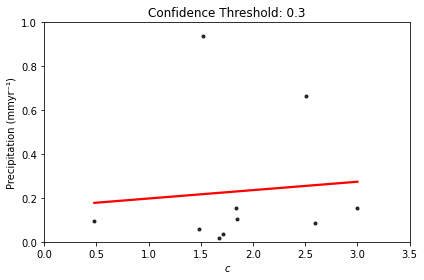

In [39]:
# Defining the libraries
import numpy as np #A libary used for working with arrays.
import matplotlib.pyplot as plt # A libary used for plotting graphs.
import pandas as pd # A libary used for faster data analysis, works in conjunction with the numpy libary.
import seaborn as sns
from matplotlib.patches import Patch # Used to customise legend.
from matplotlib.lines import Line2D # Used to customise legend.
from sklearn.linear_model import LinearRegression # A pre-defined linear regression model.
from scipy import stats #Importing a statistic libary.
# The following command allows for the storing of created plots in the notebook document for the readers convenience.
%matplotlib inline

# Creates Linear Regression

x = np.array([2.51, 1.52, 1.84, 3, 1.71, 0.48, 1.85, 1.48, 2.59, 1.67])

y = np.array([0.663776239, 0.939126988, 0.153244611, 0.153244611, 0.033760179, 0.094352354,
                0.104805725, 0.058633365, 0.083692924, 0.019327809])

sns.regplot(x, y, color = 'black', marker = '.', line_kws = {'color': 'red', 'ls': '-'}, ci = None)
plt.xlabel('c', style = 'italic')
plt.ylabel('Precipitation (mmyr⁻¹)')
plt.xlim(0, 3.5)
plt.ylim(0, 1)
plt.title('Confidence Threshold: 0.3')
plt.tight_layout()
plt.savefig('prec0.3.png')

C:\Users\Alexz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


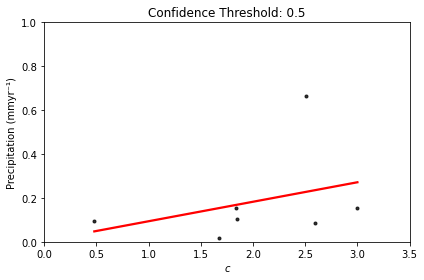

In [40]:
# Defining the libraries
import numpy as np #A libary used for working with arrays.
import matplotlib.pyplot as plt # A libary used for plotting graphs.
import pandas as pd # A libary used for faster data analysis, works in conjunction with the numpy libary.
import seaborn as sns
from matplotlib.patches import Patch # Used to customise legend.
from matplotlib.lines import Line2D # Used to customise legend.
from sklearn.linear_model import LinearRegression # A pre-defined linear regression model.
from scipy import stats #Importing a statistic libary.
# The following command allows for the storing of created plots in the notebook document for the readers convenience.
%matplotlib inline

# Creates Linear Regression

x = np.array([2.51, 1.84, 3, 0.48, 1.85, 2.59, 1.67])
y = np.array([0.663776239, 0.153244611, 0.153244611, 0.094352354, 0.104805725, 0.083692924, 0.019327809])

sns.regplot(x, y, color = 'black', marker = '.', line_kws = {'color': 'red', 'ls': '-'}, ci = None)
plt.xlabel('c', style = 'italic')
plt.ylabel('Precipitation (mmyr⁻¹)')
plt.xlim(0, 3.5)
plt.ylim(0, 1)
plt.title('Confidence Threshold: 0.5')
plt.tight_layout()
plt.savefig('prec0.5.png')

In [5]:
# Pearsons correlation coefficent calculation
x = [2.51, 1.84, 3, 0.48, 1.85, 2.59, 1.67]
y = [0.663776239, 0.153244611, 0.153244611, 0.094352354, 0.104805725, 0.083692924, 0.019327809]
from scipy.stats import linregress
linregress(x,y)

LinregressResult(slope=0.0888379428236391, intercept=0.004863335719781592, rvalue=0.3367967326414731, pvalue=0.46010481213136367, stderr=0.11107124444014968, intercept_stderr=0.2368694967695236)